In [1]:
import sys
import importlib
import scanpy as sc
from pympler import asizeof
import numpy as np
import pandas as pd
import py8rds

# Get data

In [28]:
# generate rds with data.frame
! R --vanilla --silent --no-echo -e 'saveRDS(mtcars,"mtcars.rds")'
# generate rds with matrix
! R --vanilla --silent --no-echo -e 'corr=cor(mtcars);saveRDS(corr,"corr.rds")'

# Quick start
## Read data.frame as pandas DataFrame

In [2]:
df = py8rds.as_data_frame('mtcars.rds')
df[0:2]

[2026-01-16 11:44:03,369][INFO] Reading mtcars.rds
[2026-01-16 11:44:03,374][INFO] Done reading mtcars.rds


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.9,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.9,2.875,17.02,0.0,1.0,4.0,4.0


## Read array as numpy

In [3]:
a = py8rds.as_numpy('corr.rds')
a

[2026-01-16 11:44:06,081][INFO] Reading corr.rds
[2026-01-16 11:44:06,086][INFO] Done reading corr.rds


array([[ 1.        , -0.85216196, -0.84755138, -0.77616837,  0.68117191,
        -0.86765938,  0.41868403,  0.66403892,  0.59983243,  0.48028476,
        -0.55092507],
       [-0.85216196,  1.        ,  0.90203287,  0.83244745, -0.69993811,
         0.78249579, -0.59124207, -0.8108118 , -0.52260705, -0.4926866 ,
         0.52698829],
       [-0.84755138,  0.90203287,  1.        ,  0.79094859, -0.71021393,
         0.88797992, -0.43369788, -0.71041589, -0.59122704, -0.5555692 ,
         0.39497686],
       [-0.77616837,  0.83244745,  0.79094859,  1.        , -0.44875912,
         0.65874789, -0.70822339, -0.72309674, -0.24320426, -0.12570426,
         0.74981247],
       [ 0.68117191, -0.69993811, -0.71021393, -0.44875912,  1.        ,
        -0.71244065,  0.09120476,  0.44027846,  0.71271113,  0.69961013,
        -0.0907898 ],
       [-0.86765938,  0.78249579,  0.88797992,  0.65874789, -0.71244065,
         1.        , -0.17471588, -0.55491568, -0.69249526, -0.583287  ,
         0.427

### or as anndata to keep names

In [4]:
a = py8rds.as_anndata('corr.rds')
a

[2026-01-16 11:44:09,487][INFO] Reading corr.rds
[2026-01-16 11:44:09,492][INFO] Done reading corr.rds


AnnData object with n_obs × n_vars = 11 × 11

In [5]:
a.obs

""
mpg
cyl
disp
hp
drat
wt
qsec
vs
am
gear


## Read Seurat rds as anndata

In [6]:
adata = py8rds.seurat2adata("GSE268542_HuLu2023.RDS")
adata

[2026-01-16 11:44:13,787][INFO] Reading GSE268542_HuLu2023.RDS
[2026-01-16 11:44:34,536][INFO] Done reading GSE268542_HuLu2023.RDS


AnnData object with n_obs × n_vars = 3856 × 24102
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'scDblFinder.score', 'scDblFinder.class', 'percent.ribo', 'percent.HB', 'log10GenesPerUMI', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.8', 'seurat_clusters', 'Cell.ID'
    obsm: 'pca', 'harmony', 'umap'

In [7]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,scDblFinder.score,scDblFinder.class,percent.ribo,percent.HB,log10GenesPerUMI,S.Score,G2M.Score,Phase,old.ident,RNA_snn_res.0.8,seurat_clusters,Cell.ID
AAACCCAAGCATGAAT-1,Un_Inf,4112.0,1411,5.034047,0.035244,singlet,35.627432,0.000000,0.871467,0.040726,-0.015684,S,Un_Inf,3,3,CD8_T_cells
AAACCCACATCGGATT-1,Un_Inf,8614.0,2338,0.963548,0.222410,singlet,18.249362,0.011609,0.856079,-0.031988,-0.022932,G1,Un_Inf,11,11,Endothelial_cells
AAACCCATCGCCAGTG-1,Un_Inf,6930.0,1937,3.708514,0.021100,singlet,26.637807,0.014430,0.855860,-0.049365,-0.048544,G1,Un_Inf,6,6,Epithelial
AAACGAACATACGCAT-1,Un_Inf,3309.0,1477,2.508311,0.413430,singlet,21.093986,0.030221,0.900470,-0.058151,-0.035037,G1,Un_Inf,1,1,CD4_T_cells
AAACGAAGTGTACGCC-1,Un_Inf,949.0,448,3.477345,0.017133,singlet,11.907271,0.000000,0.890508,-0.034853,0.025466,G2M,Un_Inf,6,6,Epithelial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGAGCACGCACCA-1,IAV_Inf,3865.0,1658,1.759379,0.047857,singlet,22.354463,0.000000,0.897533,0.026595,0.009018,S,IAV_Inf,5,5,NK_cells
TTTGGTTCACCCTTGT-1,IAV_Inf,2716.0,1238,1.141384,0.006289,singlet,22.422680,0.000000,0.900636,0.028387,-0.033060,S,IAV_Inf,14,14,NK_cells
TTTGGTTGTCTACATG-1,IAV_Inf,3410.0,1562,8.475073,0.434059,singlet,18.768328,0.000000,0.904020,0.013719,0.003710,S,IAV_Inf,3,3,CD8_T_cells
TTTGTTGCAACACGAG-1,IAV_Inf,4056.0,1397,0.517751,0.022446,singlet,39.201183,0.000000,0.871705,0.015067,0.045832,G2M,IAV_Inf,2,2,CD8_T_cells


... storing 'orig.ident' as categorical
... storing 'scDblFinder.class' as categorical
... storing 'Phase' as categorical
... storing 'old.ident' as categorical
... storing 'RNA_snn_res.0.8' as categorical
... storing 'seurat_clusters' as categorical
... storing 'Cell.ID' as categorical


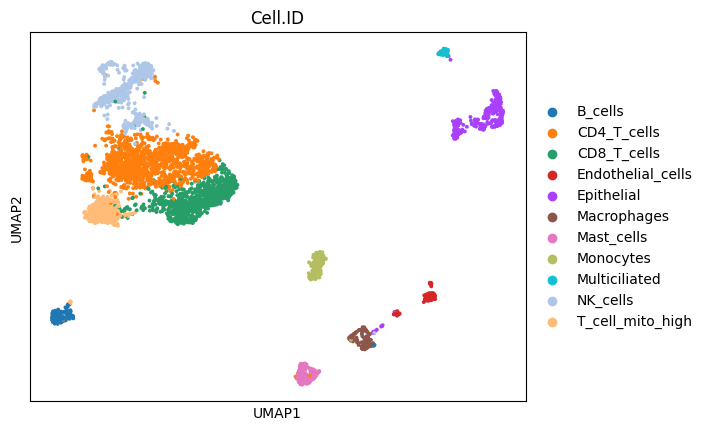

In [8]:
sc.pl.embedding(adata,color='Cell.ID',basis='umap')

## Spatial Seurat
it is more experimental, should work only for Visium (not HD)

In [2]:
robj = py8rds.parse_rds("GSM8704851_20210117-NMK0-FM1-Fc1U1Z1Bs1_obj.rds")

[2026-01-16 18:12:12,311][INFO] Reading GSM8704851_20210117-NMK0-FM1-Fc1U1Z1Bs1_obj.rds
[2026-01-16 18:13:51,606][INFO] Done reading GSM8704851_20210117-NMK0-FM1-Fc1U1Z1Bs1_obj.rds


In [3]:
v = py8rds.seurat2adata_spatial(robj)
v

AnnData object with n_obs × n_vars = 1131 × 32285
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'percent_mt', 'percent_rb', 'percent_hb', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters'
    uns: 'spatial'
    obsm: 'pca', 'umap', 'spatial'

/tmp/ipykernel_869355/220649080.py:1: FutureWarning: Use `squidpy.pl.spatial_scatter` instead.
  sc.pl.spatial(v,color='nCount_Spatial')
... storing 'orig.ident' as categorical
... storing 'SCT_snn_res.0.8' as categorical
... storing 'seurat_clusters' as categorical


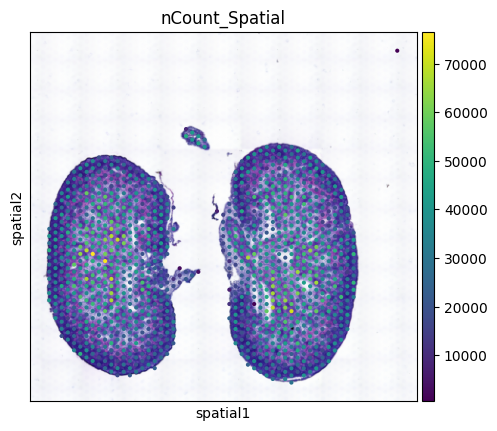

In [4]:
sc.pl.spatial(v,color='nCount_Spatial')

# A bit of customization
read file, check what is inside and select what to load

In [28]:
robj = py8rds.parse_rds("GSM8704851_20210117-NMK0-FM1-Fc1U1Z1Bs1_obj.rds")
robj.show()

[2026-01-16 14:08:47,888][INFO] Reading GSM8704851_20210117-NMK0-FM1-Fc1U1Z1Bs1_obj.rds
[2026-01-16 14:09:43,195][INFO] Done reading GSM8704851_20210117-NMK0-FM1-Fc1U1Z1Bs1_obj.rds


Robj(Seurat): 
&assays(VECSXP): 
&meta.data(data.frame): 
&active.assay(STRSXP): [SCT]
&active.ident(factor): [2,7,4,...]
&graphs(VECSXP): 
&neighbors(VECSXP): []
&reductions(VECSXP): 
&images(VECSXP): 
&project.name(STRSXP): [SeuratProject]
&misc(VECSXP): []
&version(package_version,numeric_version): 
&commands(VECSXP): 
&tools(VECSXP): []
&class(STRSXP): [Seurat]



In [10]:
# by default seurat2adata takes first assay and 'counts' layer (slot), lets see whether we have anything else here:
# lets look on assays, we want to see slots in there, so lets show 2 levels
robj.get('assays').show(level=2)

Robj(VECSXP): 
+0(Assay): 
|&counts(dgCMatrix): 
|&data(dgCMatrix): 
|&scale.data(REALSXP): []
|&key(STRSXP): [spatial_]
|&assay.orig(SYMSXP): [NULL]
|&var.features(LGLSXP): []
|&meta.features(data.frame): []
|&misc(VECSXP): []
|&class(STRSXP): [Assay]
+1(SCTAssay): 
|&SCTModel.list(VECSXP): 
|&counts(dgCMatrix): 
|&data(dgCMatrix): 
|&scale.data(REALSXP): [1.4604126183180552,-0.7391115105041035,-0.5002537882913372,...]
|&key(STRSXP): [sct_]
|&assay.orig(STRSXP): [Spatial]
|&var.features(STRSXP): [S100g,Kap,Gpx3,...]
|&meta.features(data.frame): []
|&misc(VECSXP): []
|&class(STRSXP): [SCTAssay]
*names(STRSXP): [Spatial,SCT]



In [11]:
# so we can choose between counts and SCT assays
# inside them we can take norm data or counts
# instead of re-reading file we can pass robj to seurat2adata
# lets use second assay (SCTAssay) and normalized data from there
adata = py8rds.seurat2adata(robj,assay=1,layer='data')
adata

AnnData object with n_obs × n_vars = 1131 × 17892
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'percent_mt', 'percent_rb', 'percent_hb', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.8', 'seurat_clusters'
    obsm: 'pca', 'umap'

... storing 'orig.ident' as categorical
... storing 'SCT_snn_res.0.8' as categorical
... storing 'seurat_clusters' as categorical


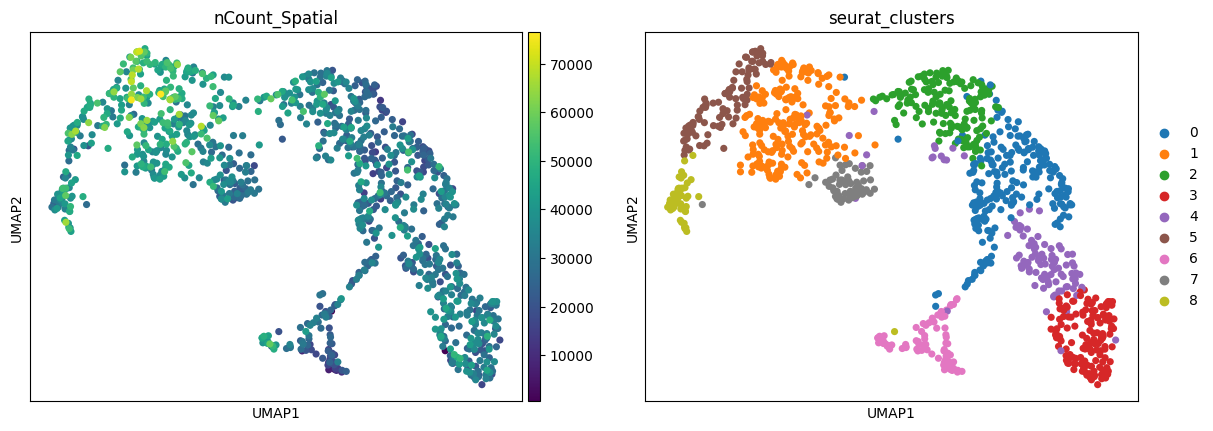

In [12]:
sc.pl.embedding(adata,basis='umap',color=['nCount_Spatial','seurat_clusters'])

# Read me all
lets see a bit deeper into the object and parse individual parts of it
it might be useful for other rds files

In [13]:
# lets look into SCTAssay
# there we have counts, data (norm counts) and even scale.data which are stored as dense matrix
robj.get(['assays',1]).show()

Robj(SCTAssay): 
&SCTModel.list(VECSXP): 
&counts(dgCMatrix): 
&data(dgCMatrix): 
&scale.data(REALSXP): [1.4604126183180552,-0.7391115105041035,-0.5002537882913372,...]
&key(STRSXP): [sct_]
&assay.orig(STRSXP): [Spatial]
&var.features(STRSXP): [S100g,Kap,Gpx3,...]
&meta.features(data.frame): []
&misc(VECSXP): []
&class(STRSXP): [SCTAssay]



In [14]:
# we can go further deep by adding indeces into argument of get function:
robj.get(['assays',1,'data','i']).show()

Robj(INTSXP): [2,3,4,...]



In [15]:
# we can load any Matrix as anndata (in order to keep dimnames if any)
py8rds.as_anndata(robj.get(['assays',0,'data']))

AnnData object with n_obs × n_vars = 1131 × 32285

In [16]:
# as_anndata can handle dense arrays as well
py8rds.as_anndata(robj.get(['assays',1,'scale.data']))

AnnData object with n_obs × n_vars = 1131 × 3000

In [17]:
# or if you don't need anndata, lets load just array
py8rds.as_numpy(robj.get(['assays',1,'scale.data']))

array([[ 1.46041262, -0.36767696, -1.11037924, ...,  3.54321844,
         0.72905635,  3.39857504],
       [-0.73911151, -0.28601689, -1.11442019, ..., -1.32033057,
         1.88475447,  0.92108783],
       [-0.50025379, -0.40758936, -0.39719277, ..., -0.47893141,
        -0.35642205, -0.35366848],
       ...,
       [-1.69822314,  5.47014157,  0.7725496 , ..., -1.59301679,
        -0.54393126, -2.26627203],
       [-0.83278925,  1.93451464,  2.1092214 , ..., -1.08258195,
        -0.93814127, -1.52665574],
       [-1.6296833 ,  2.23318129,  2.11825263, ..., -1.29557484,
         0.7145263 , -3.01812297]], shape=(3000, 1131))

In [18]:
# or sparse ones:
py8rds.as_numpy(robj.get(['assays',0,'counts']))

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 8704136 stored elements and shape (32285, 1131)>

In [19]:
# or we can read data.frame
obs = py8rds.as_data_frame(robj.get('meta.data'))
obs

,orig.ident,nCount_Spatial,nFeature_Spatial,percent_mt,percent_rb,percent_hb,nCount_SCT,nFeature_SCT,SCT_snn_res.0.8,seurat_clusters
AAACCGTTCGTCCAGG-1,SeuratProject,49787.0,9159,2.556892,18.547010,0.048205,34618.0,8819,1,1
AAACTGCTGGCTCCAA-1,SeuratProject,29993.0,6970,7.131664,22.001800,0.526790,32483.0,6922,6,6
AAAGGCTACGGACCAT-1,SeuratProject,28194.0,7237,4.242037,21.621622,0.117046,32361.0,7196,3,3
AAAGGCTCTCGCGCCG-1,SeuratProject,38968.0,8271,2.625231,19.023301,0.061589,35019.0,8215,1,1
AAAGGGATGTAGCAAG-1,SeuratProject,57269.0,9264,3.897396,18.638356,0.200807,34443.0,8161,1,1
...,...,...,...,...,...,...,...,...,...,...
TTGTGTTTCCCGAAAG-1,SeuratProject,40105.0,8030,5.827204,19.860367,1.772846,35021.0,7973,5,5
TTGTTAGCAAATTCGA-1,SeuratProject,32334.0,7756,4.292695,11.112142,1.966970,32903.0,7703,0,0
TTGTTCAGTGTGCTAC-1,SeuratProject,44568.0,8481,2.652127,19.033836,0.051607,34740.0,8381,5,5
TTGTTGTGTGTCAAGA-1,SeuratProject,23713.0,7061,3.289335,11.719310,0.084342,32390.0,7044,0,0


In [20]:
# lets look on images 
robj.get(['images']).show()

Robj(VECSXP): 
+0(VisiumV1): 
*names(STRSXP): [slice1]



In [21]:
robj.get(['images',0]).show()

Robj(VisiumV1): 
&image(REALSXP): [0.0,0.37254901960784315,0.9647058823529412,...]
&scale.factors(scalefactors): 
&coordinates(data.frame): 
&spot.radius(REALSXP): [0.013091424763311333]
&assay(STRSXP): [Spatial]
&key(STRSXP): [slice1_]
&class(STRSXP): [VisiumV1]



In [22]:
robj.get(['images',0,'image']).show() # it is 3D array, lets load it

Robj(REALSXP): [0.0,0.37254901960784315,0.9647058823529412,...]
*dim(INTSXP): [600,592,3]



In [23]:
# it is 3D array, lets load it
img = py8rds.as_numpy(robj.get(['images',0,'image']))
img

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.89019608, 0.89019608, 0.9254902 ],
        [0.23137255, 0.23137255, 0.23921569],
        [0.        , 0.        , 0.        ]],

       [[0.37254902, 0.37254902, 0.37647059],
        [0.37254902, 0.37254902, 0.37647059],
        [0.37254902, 0.37254902, 0.37647059],
        ...,
        [0.89019608, 0.89019608, 0.92156863],
        [0.23137255, 0.23137255, 0.23921569],
        [0.        , 0.        , 0.        ]],

       [[0.96470588, 0.96862745, 0.98039216],
        [0.96862745, 0.97254902, 0.98039216],
        [0.96862745, 0.97254902, 0.98039216],
        ...,
        [0.89019608, 0.89411765, 0.92156863],
        [0.23137255, 0.23137255, 0.23921569],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.07843137, 0.07843137, 0.        ],
        [0.39215686, 0.39215686, 0.        ],
        [0.40392157, 0

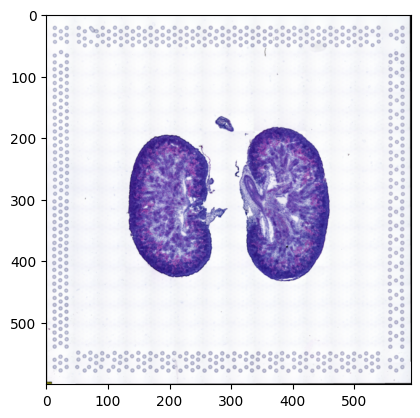

In [24]:
import matplotlib.pyplot as plt
plt.imshow(img)

# Load large 5G rds
it takes a while (~20-40min) but seems to work

In [25]:
robj = py8rds.parse_rds("GSE232863_scRNA_omics.Rds")
robj.show()

[2026-01-16 11:46:51,021][INFO] Reading GSE232863_scRNA_omics.Rds
[2026-01-16 12:20:10,780][WARNING] REFSXP index 64 out of rds.symbols range (len=62); treating as opaque reference placeholder
[2026-01-16 12:20:38,563][WARNING] REFSXP index 80 out of rds.symbols range (len=80); treating as opaque reference placeholder
[2026-01-16 12:20:38,564][WARNING] REFSXP index 81 out of rds.symbols range (len=80); treating as opaque reference placeholder
[2026-01-16 12:20:48,766][WARNING] REFSXP index 80 out of rds.symbols range (len=80); treating as opaque reference placeholder
[2026-01-16 12:20:48,772][WARNING] REFSXP index 81 out of rds.symbols range (len=80); treating as opaque reference placeholder
[2026-01-16 12:20:56,448][WARNING] REFSXP index 82 out of rds.symbols range (len=80); treating as opaque reference placeholder
[2026-01-16 12:20:58,124][WARNING] REFSXP index 80 out of rds.symbols range (len=80); treating as opaque reference placeholder
[2026-01-16 12:20:58,132][WARNING] REFSXP ind

Robj(Seurat): 
&assays(VECSXP): 
&meta.data(data.frame): 
&active.assay(STRSXP): [RNA]
&active.ident(factor): [1,1,1,...]
&graphs(VECSXP): 
&neighbors(VECSXP): 
&reductions(VECSXP): 
&images(VECSXP): []
&project.name(STRSXP): [SeuratProject]
&misc(VECSXP): []
&version(package_version,numeric_version): 
&commands(VECSXP): 
&tools(VECSXP): []
&class(STRSXP): [Seurat]



In [26]:
robj.show()

Robj(Seurat): 
&assays(VECSXP): 
&meta.data(data.frame): 
&active.assay(STRSXP): [RNA]
&active.ident(factor): [1,1,1,...]
&graphs(VECSXP): 
&neighbors(VECSXP): 
&reductions(VECSXP): 
&images(VECSXP): []
&project.name(STRSXP): [SeuratProject]
&misc(VECSXP): []
&version(package_version,numeric_version): 
&commands(VECSXP): 
&tools(VECSXP): []
&class(STRSXP): [Seurat]



In [27]:
robj.get(['assays',1]).show(2)

Robj(ChromatinAssay): 
&ranges(GRanges): 
|&seqnames(Rle): 
|&strand(Rle): 
|&ranges(IRanges): 
|&seqinfo(Seqinfo): 
|&elementMetadata(DFrame): 
|&elementType(STRSXP): [ANY]
|&metadata(VECSXP): []
|&class(STRSXP): [GRanges]
&motifs(Motif): 
|&data(lgCMatrix): 
|&pwm(VECSXP): 
|&motif.names(VECSXP): 
|&positions(CompressedGRangesList): 
|&meta.data(data.frame): []
|&class(STRSXP): [Motif]
&fragments(VECSXP): 
|+0(Fragment): 
&seqinfo(REFSXP): [NULL]
&annotation(GRanges): 
|&seqnames(Rle): 
|&strand(Rle): 
|&ranges(IRanges): 
|&seqinfo(Seqinfo): 
|&elementMetadata(DFrame): 
|&elementType(STRSXP): [ANY]
|&metadata(VECSXP): []
|&class(STRSXP): [GRanges]
&bias(REFSXP): [NULL]
&positionEnrichment(VECSXP): []
&links(GRanges): 
|&seqnames(Rle): 
|&strand(Rle): 
|&ranges(IRanges): 
|&seqinfo(Seqinfo): 
|&elementMetadata(DFrame): 
|&elementType(STRSXP): [ANY]
|&metadata(VECSXP): []
|&class(STRSXP): [GRanges]
&counts(dgCMatrix): 
|&i(INTSXP): [2174,2421,2721,...]
|&p(INTSXP): [0,130,1229,...]